Epoch 1/1000
3/3 [==============================] - 0s 42ms/step - loss: 0.0961 - val_loss: 0.0919
Epoch 2/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.0955 - val_loss: 0.0919
Epoch 3/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.0961 - val_loss: 0.0919
Epoch 4/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.0952 - val_loss: 0.0919
Epoch 5/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.0933 - val_loss: 0.0919
Epoch 6/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.0939 - val_loss: 0.0919
Epoch 7/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.0943 - val_loss: 0.0919
Epoch 8/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.0939 - val_loss: 0.0919
Epoch 9/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.0961 - val_loss: 0.0919
Epoch 10/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.0938 - val_loss: 0.0919
Epoch 11/1000
3/3 

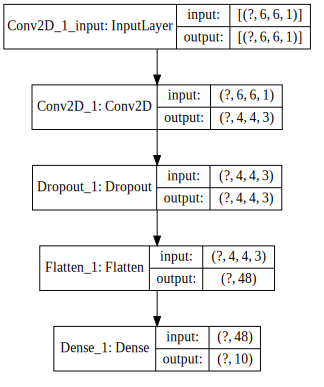

In [3]:
# coding: utf-8
# 使用CNN的學習範例

# CNN Train 2 - dropout
# 匯入Keras與其他的函式庫
import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, Dropout
from keras.utils import np_utils
from tensorflow.keras.optimizers import SGD

# 匯入用於提早結束的callbacks與資料處理所需的Numpy
import tensorflow.keras.callbacks as callbacks
import numpy as np

# 匯入顯示SVG時所需的函式庫
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot

# 準備亂數作為測試資料
x_train = np.random.random((100, 6, 6, 1))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)
x_test = np.random.random((20, 6, 6, 1))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(20, 1)), num_classes=10)

# 增加丟棄並製作卷積神經網路的模型
model = Sequential()
model.add(Conv2D(filters=3, kernel_size=(3, 3), input_shape=(6, 6, 1), kernel_initializer='lecun_uniform', name='Conv2D_1'))
model.add(Dropout(rate=0.5, name='Dropout_1'))
model.add(Flatten(name='Flatten_1'))
model.add(Dense(units=10, activation='softmax', name='Dense_1'))

# 設定提早結束
earlyStopping = callbacks.EarlyStopping(monitor='val_loss', patience=5)

# 編譯模型
model.compile(loss='mean_squared_error', optimizer='sgd')
model.fit(x_train, y_train, batch_size=32, epochs=1000, callbacks=[earlyStopping], validation_split=0.2)

# 輸出序列
SVG(model_to_dot(model, show_shapes=True,dpi=70).create(prog='dot', format='svg'))